<a href="https://colab.research.google.com/github/rafaelaperlingeiro/Statistics-for-Data-Science/blob/notebooks-initial/Avaliacao_de_disciplinas_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Avaliação de disciplinas Pós Graduação Descomplica**

Trabalho de conclusão de curso para MBA em Business Intelligence.

Proposta: Criar avaliação de disciplinas para averiguar qualidade do curso, identificar pontos de melhoria e obter dados relevantes sobre a percepção dos estudantes.

Etapas:
1. Criação de Google forms para avaliação de videoaula, material escrito e exercícios de cada disciplina do curso 1
2. Geração de planilha no google sheets com resultados das avaliações para o curso 1.
3. **Criação de colab para análise de dados**
4. **Conexão via API para vincular dados em planilha google sheets**
5. **Tratamento de dados e transformação em dataframe pandas**
6. **Elaboração de medidas e métricas**
7. **Inclusão de dados sobre outros cursos (2, 3, 4, 5) com objetivo de aprendizado e geração de dados fictícios para análise.(Foi utilizado Chat GPT para criação de texto de avaliações positivas e negativas sobre os cursos)**
8. **Geração de gráficos para análise dos dados levantados**

OBS: Passos 3 a 8 desenvolvidos neste colab.


## **Fase 1: Instalação, importação de bibliotecas e conexão com Google Drive**

In [ ]:
# Instalação da lib para conexão de api com google drive
!pip install --upgrade google-api-python-client google-auth-httplib2 google-auth-oauthlib

In [ ]:
# Importação
from google.colab import auth
from googleapiclient.discovery import build

# Autenticação e autorização da aplicação
auth.authenticate_user()

# Build the service object
service = build('sheets', 'v4')

# API requests using `service.spreadsheets().<method>()`


## **Fase 2: Importação da planilha do Google Sheets e outros ajustes**

In [ ]:
SPREADSHEET_ID = '1FrwQ99e3sbrXAME2sHjIrMu4-bjRk6y1LaUKLkBadE0'
RANGE_NAME = 'curso1!A1:E25'  # Nome da aba e a faixa desejada

result = service.spreadsheets().values().get(spreadsheetId=SPREADSHEET_ID, range=RANGE_NAME).execute()
values = result.get('values', [])

if not values:
    print('Nenhum dado encontrado.')
else:
    print('Valores na planilha:')
    for row in values:
        print(', '.join(row))


Valores na planilha:
Carimbo de data/hora, Como você avalia as vídeo aulas?, Como você avalia o material escrito?, Como você avalia os exercícios?, Escreva aqui suas sugestões, críticas e elogios
25/10/2023 17:19:39, 9, 10, 8, A videoaula foi incrível! As explicações foram claras e fáceis de entender, e os exercícios práticos me ajudaram a aplicar o que aprendi.
25/10/2023 17:20:01, 9, 10, 10, O material escrito complementou perfeitamente a videoaula. Adorei a organização e a clareza das informações.
25/10/2023 17:20:20, 10, 10, 10, Essa é, de longe, a melhor videoaula que já assisti. Os exercícios práticos me desafiaram, e o material escrito é um ótimo guia de referência.
25/10/2023 17:20:47, 4, 5, 3, As videoaulas foram um pouco confusas, e os exercícios não eram muito relevantes. Fiquei um pouco desapontado.
25/10/2023 17:21:12, 3, 2, 4, O material escrito não acompanhou as videoaulas. Foi difícil encontrar informações relevantes. Não fiquei satisfeito.
25/10/2023 17:21:33, 1, 2, 1,

In [ ]:
import pandas as pd

In [ ]:
if not values:
    print('Nenhum dado encontrado.')
else:
    # Convertendo os valores em um DataFrame do Pandas
    df = pd.DataFrame(values[1:], columns=values[0])  # Use a primeira linha como cabeçalho

    # Agora, você tem um DataFrame do Pandas que contém os dados da planilha
    print(df)

   Carimbo de data/hora Como você avalia as vídeo aulas?  \
0   25/10/2023 17:19:39                                9   
1   25/10/2023 17:20:01                                9   
2   25/10/2023 17:20:20                               10   
3   25/10/2023 17:20:47                                4   
4   25/10/2023 17:21:12                                3   
5   25/10/2023 17:21:33                                1   
6   25/10/2023 17:24:07                                9   
7   25/10/2023 17:24:24                               10   
8   25/10/2023 17:24:43                               10   
9   25/10/2023 17:25:03                                1   
10  25/10/2023 17:28:03                                7   
11  25/10/2023 17:28:22                                7   
12  25/10/2023 17:28:41                                6   
13  25/10/2023 17:29:34                                8   
14  25/10/2023 17:29:55                                7   
15  25/10/2023 17:30:23                 

In [ ]:
# Avaliação dos tipos dos objetos
tipos = df.dtypes
print(tipos)

Carimbo de data/hora                               object
Como você avalia as vídeo aulas?                   object
Como você avalia o material escrito?               object
Como você avalia os exercícios?                    object
Escreva aqui suas sugestões, críticas e elogios    object
dtype: object


In [ ]:
# Criando um novo DataFrame com tipos de dados alterados
curso1_df = df.copy()  # Clonando o DataFrame original

In [ ]:
# Convertendo as colunas para float64
curso1_df['Como você avalia as vídeo aulas?'] = curso1_df['Como você avalia as vídeo aulas?'].astype(int)
curso1_df['Como você avalia o material escrito?'] = curso1_df['Como você avalia o material escrito?'].astype(int)
curso1_df['Como você avalia os exercícios?'] = curso1_df['Como você avalia os exercícios?'].astype(int)

In [ ]:
print(tipos)

Carimbo de data/hora                               object
Como você avalia as vídeo aulas?                   object
Como você avalia o material escrito?               object
Como você avalia os exercícios?                    object
Escreva aqui suas sugestões, críticas e elogios    object
dtype: object


In [ ]:
curso1_df['Média'] = curso1_df[['Como você avalia as vídeo aulas?', 'Como você avalia o material escrito?', 'Como você avalia os exercícios?']].mean(axis=1)

In [ ]:
curso1_df

,Carimbo de data/hora,Como você avalia as vídeo aulas?,Como você avalia o material escrito?,Como você avalia os exercícios?,"Escreva aqui suas sugestões, críticas e elogios",Média
0,25/10/2023 17:19:39,9,10,8,A videoaula foi incrível! As explicações foram...,9.000000
1,25/10/2023 17:20:01,9,10,10,O material escrito complementou perfeitamente ...,9.666667
2,25/10/2023 17:20:20,10,10,10,"Essa é, de longe, a melhor videoaula que já as...",10.000000
3,25/10/2023 17:20:47,4,5,3,"As videoaulas foram um pouco confusas, e os ex...",4.000000
4,25/10/2023 17:21:12,3,2,4,O material escrito não acompanhou as videoaula...,3.000000
5,25/10/2023 17:21:33,1,2,1,A qualidade das videoaulas deixou muito a dese...,1.333333
6,25/10/2023 17:24:07,9,10,9,Adorei a maneira como o conteúdo da videoaula ...,9.333333
7,25/10/2023 17:24:24,10,10,10,Essa é a videoaula mais esclarecedora que já v...,10.000000
8,25/10/2023 17:24:43,10,10,10,"Excelente combinação de videoaula, exercícios ...",10.000000
9,25/10/2023 17:25:03,1,1,1,"Infelizmente, as videoaulas eram monótonas, e ...",1.000000


In [ ]:
media_video = curso1_df['Como você avalia as vídeo aulas?'].mean(axis=0)
media_escrito = curso1_df['Como você avalia o material escrito?'].mean(axis=0)
media_exercicios = curso1_df['Como você avalia os exercícios?'].mean(axis=0)
media_geral = curso1_df['Média'].mean(axis=0)

print(media_video, media_escrito, media_exercicios, media_geral)


6.25 6.458333333333333 6.041666666666667 6.25


## **Fase 3: Gerando e adicionando dados fictícios para alunos e outros cursos com Python**

### Curso 1

In [ ]:
#Adicionando comentários faltantes com Chat GPT:

novos_comentarios = [
    "A videoaula poderia ser mais envolvente e interativa.",
    "Infelizmente, a videoaula não atendeu às minhas expectativas.",
    "Gostei da abordagem das videoaulas, tornou o conteúdo mais acessível.",
    "Excelente videoaula! A clareza das explicações foi impressionante.",
    "As videoaulas me ajudaram a entender um tópico complexo. Ótimo trabalho!"
]

posicoes = [19, 20, 21, 22, 23]

In [ ]:
curso1_df.at[19, 'Escreva aqui suas sugestões, críticas e elogios'] = "A videoaula poderia ser mais envolvente e interativa."
curso1_df.at[20, 'Escreva aqui suas sugestões, críticas e elogios'] = "Infelizmente, a videoaula não atendeu às minhas expectativas."
curso1_df.at[21, 'Escreva aqui suas sugestões, críticas e elogios'] = "Gostei da abordagem das videoaulas, tornou o conteúdo mais acessível."
curso1_df.at[22, 'Escreva aqui suas sugestões, críticas e elogios'] = "Excelente videoaula! A clareza das explicações foi impressionante."
curso1_df.at[23, 'Escreva aqui suas sugestões, críticas e elogios'] = "As videoaulas me ajudaram a entender um tópico complexo. Ótimo trabalho!"

In [ ]:
curso1_df

,Carimbo de data/hora,Como você avalia as vídeo aulas?,Como você avalia o material escrito?,Como você avalia os exercícios?,"Escreva aqui suas sugestões, críticas e elogios",Média
0,25/10/2023 17:19:39,9,10,8,A videoaula foi incrível! As explicações foram...,9.000000
1,25/10/2023 17:20:01,9,10,10,O material escrito complementou perfeitamente ...,9.666667
2,25/10/2023 17:20:20,10,10,10,"Essa é, de longe, a melhor videoaula que já as...",10.000000
3,25/10/2023 17:20:47,4,5,3,"As videoaulas foram um pouco confusas, e os ex...",4.000000
4,25/10/2023 17:21:12,3,2,4,O material escrito não acompanhou as videoaula...,3.000000
5,25/10/2023 17:21:33,1,2,1,A qualidade das videoaulas deixou muito a dese...,1.333333
6,25/10/2023 17:24:07,9,10,9,Adorei a maneira como o conteúdo da videoaula ...,9.333333
7,25/10/2023 17:24:24,10,10,10,Essa é a videoaula mais esclarecedora que já v...,10.000000
8,25/10/2023 17:24:43,10,10,10,"Excelente combinação de videoaula, exercícios ...",10.000000
9,25/10/2023 17:25:03,1,1,1,"Infelizmente, as videoaulas eram monótonas, e ...",1.000000


### Curso 2

In [ ]:
curso2_df = curso1_df.copy()

In [ ]:
tamanho = curso2_df.shape

print(tamanho)

(24, 6)


In [ ]:
import numpy as np

In [ ]:
# Criando classe para gerar notas aleatórias com média pré definida para preenchimento dos dataframes:
class GeraNotas:
    def __init__(self, media_desejada, min, max, len):
      self.media_desejada = media_desejada
      self.min = min
      self.max = max
      self.len = len
    def gerarnotas(self):
      notas = np.random.randint(self.min, self.max, self.len)
      desvio = self.media_desejada - np.mean(notas)
      notas += int(desvio)
      notas = np.clip(notas, self.min, self.max)
      return notas

In [ ]:
# Gerando notas para o df:
a = 0
while a < 3:

  if __name__ == '__main__':
      len = 24
      media_desejada = 2
      min = 0
      max = 10
      gerador = GeraNotas(media_desejada, min, max, len)
      if a == 0:
        notasvid = gerador.gerarnotas()
        print(f'Notas da vídeo aula (notasvid): {notasvid}')
        print(f'Média: {notasvid.mean()}')
      elif a == 1:
        notasler = gerador.gerarnotas()
        print(f'Notas da leitura(notasler): {notasler}')
        print(f'Média: {notasler.mean()}')
      else:
        notasexer = gerador.gerarnotas()
        print(f'Notas dos exercícios(notasexer): {notasexer}')
        print(f'Média: {notasexer.mean()}')


  a = a+1

Notas da vídeo aula (notasvid): [0 1 3 4 0 4 0 5 1 7 6 7 0 6 6 3 7 0 0 3 3 3 0 3]
Média: 3.0
Notas da leitura(notasler): [1 1 4 0 0 2 7 1 0 3 0 0 6 6 2 1 6 1 6 6 0 6 4 1]
Média: 2.6666666666666665
Notas dos exercícios(notasexer): [6 2 3 3 2 3 0 2 0 3 4 8 0 3 3 3 1 2 0 3 1 6 3 5]
Média: 2.75


In [ ]:
#Substituindo valores no df

curso2_df['Como você avalia as vídeo aulas?'] = np.array(notasvid)
curso2_df['Como você avalia o material escrito?'] = np.array(notasler)
curso2_df['Como você avalia os exercícios?'] = np.array(notasexer)
curso2_df['Média'] = curso2_df[['Como você avalia as vídeo aulas?', 'Como você avalia o material escrito?', 'Como você avalia os exercícios?']].mean(axis=1)

In [ ]:
#Criando comentários no chat gpt para inclusão na coluna para comentários

comentarios = [
        "A videoaula foi altamente informativa, o material escrito foi um ótimo guia complementar e os exercícios eram desafiadores, proporcionando uma experiência de aprendizado enriquecedora.",
        "Adorei a videoaula, que foi clara e envolvente. O material escrito tornou o conteúdo ainda mais acessível, e os exercícios me ajudaram a consolidar o conhecimento.",
        "As videoaulas foram excelentes, com ótima apresentação visual. O material escrito serviu como um excelente recurso de referência, e os exercícios foram estimulantes.",
        "A videoaula me manteve engajado o tempo todo. O material escrito era bem organizado e útil, e os exercícios práticos eram desafiadores, o que eu apreciei.",
        "A videoaula foi uma ótima introdução ao tema. O material escrito é um recurso valioso, e os exercícios ajudaram a reforçar o que aprendi.",
        "Infelizmente, a videoaula não atendeu às minhas expectativas. O material escrito era confuso, e os exercícios eram desinteressantes, tornando a experiência de aprendizado decepcionante.",
        "A videoaula foi pouco envolvente e desorganizada. O material escrito carecia de clareza, e os exercícios não eram relevantes, dificultando a assimilação do conteúdo.",
        "As videoaulas não conseguiram prender minha atenção. O material escrito era difícil de acompanhar, e os exercícios eram monótonos, resultando em uma experiência insatisfatória.",
        "A videoaula deixou muito a desejar em termos de clareza. O material escrito não contribuiu para a compreensão, e os exercícios eram entediantes, prejudicando o aprendizado.",
        "A videoaula foi desorganizada e confusa. O material escrito não era útil, e os exercícios não estavam alinhados com o conteúdo, tornando a experiência abaixo das expectativas.",
        "A videoaula foi razoável, com altos e baixos. O material escrito serviu como um guia de referência útil, mas os exercícios poderiam ser mais variados.",
        "As videoaulas foram medianas, com algumas partes mais interessantes do que outras. O material escrito ajudou a esclarecer alguns pontos, e os exercícios foram aceitáveis.",
        "A videoaula teve momentos de clareza, mas também de confusão. O material escrito complementou bem em algumas partes, e os exercícios foram moderadamente úteis.",
        "A videoaula foi regular, sem surpresas. O material escrito era básico, e os exercícios forneceram prática, mas sem grandes desafios.",
        "A videoaula apresentou informações mistas. O material escrito foi útil em algumas seções, e os exercícios eram aceitáveis, mas não excepcionais."
        "A videoaula foi regular, com altos e baixos. O material escrito serviu como um guia de referência útil, mas os exercícios poderiam ser mais variados.",
        "As videoaulas foram medianas, com algumas partes mais interessantes do que outras. O material escrito ajudou a esclarecer alguns pontos, e os exercícios foram aceitáveis.",
        "A videoaula teve momentos de clareza, mas também de confusão. O material escrito complementou bem em algumas partes, e os exercícios foram moderadamente úteis.",
        "A videoaula foi regular, sem surpresas. O material escrito era básico, e os exercícios forneceram prática, mas sem grandes desafios.",
        "A videoaula apresentou informações mistas. O material escrito foi útil em algumas seções, e os exercícios eram aceitáveis, mas não excepcionais.",
        "A videoaula não se destacou de maneira significativa. O material escrito era padrão, e os exercícios eram passáveis, sem grandes destaques.",
        "A videoaula foi mediana, não foi ruim, mas também não foi excepcional. O material escrito foi decente, e os exercícios cumpriram seu propósito.",
        "As videoaulas foram regulares. O material escrito era funcional, e os exercícios forneceram alguma prática, embora não tenham sido notáveis.",
        "A videoaula teve altos e baixos, com partes claras e confusas. O material escrito foi útil em partes, e os exercícios forneceram alguma prática.",
        "A videoaula foi aceitável. O material escrito era padrão, e os exercícios eram razoáveis para a prática."
    ]

In [ ]:
curso2_df['Escreva aqui suas sugestões, críticas e elogios'] = comentarios

In [ ]:
curso2_df


,Carimbo de data/hora,Como você avalia as vídeo aulas?,Como você avalia o material escrito?,Como você avalia os exercícios?,"Escreva aqui suas sugestões, críticas e elogios",Média
0,25/10/2023 17:19:39,0,1,6,"A videoaula foi altamente informativa, o mater...",2.333333
1,25/10/2023 17:20:01,1,1,2,"Adorei a videoaula, que foi clara e envolvente...",1.333333
2,25/10/2023 17:20:20,3,4,3,"As videoaulas foram excelentes, com ótima apre...",3.333333
3,25/10/2023 17:20:47,4,0,3,A videoaula me manteve engajado o tempo todo. ...,2.333333
4,25/10/2023 17:21:12,0,0,2,A videoaula foi uma ótima introdução ao tema. ...,0.666667
5,25/10/2023 17:21:33,4,2,3,"Infelizmente, a videoaula não atendeu às minha...",3.000000
6,25/10/2023 17:24:07,0,7,0,A videoaula foi pouco envolvente e desorganiza...,2.333333
7,25/10/2023 17:24:24,5,1,2,As videoaulas não conseguiram prender minha at...,2.666667
8,25/10/2023 17:24:43,1,0,0,A videoaula deixou muito a desejar em termos d...,0.333333
9,25/10/2023 17:25:03,7,3,3,A videoaula foi desorganizada e confusa. O mat...,4.333333


### Curso 3

In [ ]:
curso3_df = curso2_df.copy()

In [ ]:
# Gerando notas para o df:
a = 0
while a < 3:

  if __name__ == '__main__':
      len = 24
      media_desejada = 9
      min = 0
      max = 10
      gerador = GeraNotas(media_desejada, min, max, len)
      if a == 0:
        notasvid = gerador.gerarnotas()
        print(f'Notas da vídeo aula (notasvid): {notasvid}')
      elif a == 1:
        notasler = gerador.gerarnotas()
        print(f'Notas da leitura(notasler): {notasler}')
      else:
        notasexer = gerador.gerarnotas()
        print(f'Notas dos exercícios(notasexer): {notasexer}')

  a = a+1

Notas da vídeo aula (notasvid): [ 5  8  5 10 10  5  7 10 10 10 10 10  8 10  4  9  8  7  8  6 10  4 10  5]
Notas da leitura(notasler): [ 8  7  4 10  6 10 10 10  6 10  7 10  7 10 10  5  4 10  8  7  9 10 10  6]
Notas dos exercícios(notasexer): [10  6  9  5  7 10 10 10 10  5  7  9 10 10  8  9  9 10  7  6  5 10  5  8]


In [ ]:
notas_baixas = np.random.normal(4, 1, 24)

print(notas_baixas)

notas_baixas = np.clip(notas_baixas, 0, 10).astype(int)

print(notas_baixas)

notasexer = (notas_baixas)

print(notasexer)

[4.92350862 4.20705828 3.3882211  3.63902339 5.44801063 5.41008357
 5.12809642 3.63436867 3.97228992 3.98443853 2.72224347 2.87499724
 2.57701336 2.72679628 3.73375973 3.87928793 3.40781126 3.39290368
 3.18784479 3.74563095 4.52821911 4.2021497  4.28527359 4.86099082]
[4 4 3 3 5 5 5 3 3 3 2 2 2 2 3 3 3 3 3 3 4 4 4 4]
[4 4 3 3 5 5 5 3 3 3 2 2 2 2 3 3 3 3 3 3 4 4 4 4]


In [ ]:
#Substituindo valores no df

curso3_df['Como você avalia as vídeo aulas?'] = np.array(notasvid)
curso3_df['Como você avalia o material escrito?'] = np.array(notasler)
curso3_df['Como você avalia os exercícios?'] = np.array(notasexer)
curso3_df['Média'] = curso3_df[['Como você avalia as vídeo aulas?', 'Como você avalia o material escrito?', 'Como você avalia os exercícios?']].mean(axis=1)

In [ ]:
comentarios = [
        "A videoaula foi excepcional, superando todas as expectativas. O material escrito enriqueceu ainda mais o conteúdo, e os exercícios desafiadores aprimoraram o aprendizado.",
        "Adorei a videoaula! Foi extremamente clara e envolvente. O material escrito complementou brilhantemente o conteúdo, e os exercícios eram estimulantes e informativos.",
        "As videoaulas foram incríveis, com uma apresentação visual impecável. O material escrito foi um guia de referência valioso, e os exercícios foram desafiadores e recompensadores.",
        "A videoaula manteve meu interesse do início ao fim. O material escrito estava bem organizado e informativo, e os exercícios práticos eram excelentes para a prática.",
        "A videoaula ofereceu uma introdução brilhante ao tópico. O material escrito é uma fonte de referência valiosa, e os exercícios ajudaram a consolidar o conhecimento de forma eficaz.",
        "As videoaulas foram excelentes, proporcionando uma compreensão aprofundada. O material escrito complementou bem o conteúdo, e os exercícios foram desafiadores, promovendo o crescimento intelectual.",
        "A videoaula foi altamente esclarecedora e envolvente. O material escrito foi uma adição valiosa, e os exercícios práticos contribuíram para uma aprendizagem sólida.",
        "Estou maravilhado com a qualidade da videoaula. O material escrito foi claro e informativo, e os exercícios me desafiaram de maneira positiva, proporcionando uma experiência de aprendizado excepcional.",
        "A videoaula superou todas as expectativas. O material escrito era altamente instrutivo, e os exercícios foram envolventes e recompensadores, promovendo um aprendizado profundo.",
        "A videoaula foi uma experiência incrível. O material escrito serviu como uma excelente fonte de referência, e os exercícios proporcionaram uma prática eficaz e desafiadora.",
        "A videoaula foi extraordinariamente informativa, com uma apresentação visual impressionante. O material escrito enriqueceu a compreensão, e os exercícios ofereceram uma prática valiosa.",
        "Adorei cada aspecto da videoaula, que foi clara e envolvente. O material escrito complementou brilhantemente o conteúdo, e os exercícios eram desafiadores e eficazes.",
        "As videoaulas eram excepcionais, proporcionando uma visão aprofundada. O material escrito era um guia valioso, e os exercícios desafiaram de maneira construtiva.",
        "A videoaula superou minhas expectativas. O material escrito era claro e informativo, e os exercícios eram altamente estimulantes, proporcionando uma experiência de aprendizado de alto nível.",
        "A qualidade da videoaula foi impressionante. O material escrito serviu como um guia de referência valioso, e os exercícios foram desafiadores e recompensadores.",
        "A videoaula foi excepcional, superando todas as expectativas. O material escrito enriqueceu ainda mais o conteúdo, e os exercícios desafiadores aprimoraram o aprendizado.",
        "Adorei a videoaula! Foi extremamente clara e envolvente. O material escrito complementou brilhantemente o conteúdo, e os exercícios eram estimulantes e informativos.",
        "As videoaulas foram incríveis, com uma apresentação visual impecável. O material escrito foi um guia de referência valioso, e os exercícios foram desafiadores e recompensadores.",
        "A videoaula manteve meu interesse do início ao fim. O material escrito estava bem organizado e informativo, e os exercícios práticos eram excelentes para a prática.",
        "A videoaula ofereceu uma introdução brilhante ao tópico. O material escrito é uma fonte de referência valiosa, e os exercícios ajudaram a consolidar o conhecimento de forma eficaz.",
        "As videoaulas foram excelentes, proporcionando uma compreensão aprofundada. O material escrito complementou bem o conteúdo, e os exercícios foram desafiadores, promovendo o crescimento intelectual.",
        "A videoaula foi altamente esclarecedora e envolvente. O material escrito foi uma adição valiosa, e os exercícios práticos contribuíram para uma aprendizagem sólida.",
        "Estou maravilhado com a qualidade da videoaula. O material escrito foi claro e informativo, e os exercícios me desafiaram de maneira positiva, proporcionando uma experiência de aprendizado excepcional.",
        "A videoaula superou todas as expectativas. O material escrito era altamente instrutivo, e os exercícios foram envolventes e recompensadores, promovendo um aprendizado profundo.",
    ]


In [ ]:
curso3_df['Escreva aqui suas sugestões, críticas e elogios'] = comentarios

In [ ]:
curso3_df

,Carimbo de data/hora,Como você avalia as vídeo aulas?,Como você avalia o material escrito?,Como você avalia os exercícios?,"Escreva aqui suas sugestões, críticas e elogios",Média
0,25/10/2023 17:19:39,5,8,4,"A videoaula foi excepcional, superando todas a...",5.666667
1,25/10/2023 17:20:01,8,7,4,Adorei a videoaula! Foi extremamente clara e e...,6.333333
2,25/10/2023 17:20:20,5,4,3,"As videoaulas foram incríveis, com uma apresen...",4.000000
3,25/10/2023 17:20:47,10,10,3,A videoaula manteve meu interesse do início ao...,7.666667
4,25/10/2023 17:21:12,10,6,5,A videoaula ofereceu uma introdução brilhante ...,7.000000
5,25/10/2023 17:21:33,5,10,5,"As videoaulas foram excelentes, proporcionando...",6.666667
6,25/10/2023 17:24:07,7,10,5,A videoaula foi altamente esclarecedora e envo...,7.333333
7,25/10/2023 17:24:24,10,10,3,Estou maravilhado com a qualidade da videoaula...,7.666667
8,25/10/2023 17:24:43,10,6,3,A videoaula superou todas as expectativas. O m...,6.333333
9,25/10/2023 17:25:03,10,10,3,A videoaula foi uma experiência incrível. O ma...,7.666667


### Curso 4

In [ ]:
curso4_df = curso3_df.copy()

In [ ]:
# Gerando notas para o df:
a = 0
while a < 3:

  if __name__ == '__main__':
      len = 24
      media_desejada = 7
      min = 0
      max = 10
      gerador = GeraNotas(media_desejada, min, max, len)
      if a == 0:
        notasvid = gerador.gerarnotas()
        print(f'Notas da vídeo aula (notasvid): {notasvid}')
      elif a == 1:
        notasler = gerador.gerarnotas()
        print(f'Notas da leitura(notasler): {notasler}')
      else:
        notasexer = gerador.gerarnotas()
        print(f'Notas dos exercícios(notasexer): {notasexer}')

  a = a+1

Notas da vídeo aula (notasvid): [ 4 10  4  9  5  5 10  7  5  9  6  5  7  7  6  4  7  6  9  8  6  3 10  5]
Notas da leitura(notasler): [ 6  4  3  3  2  5 10  9  5 10  5  9  9  5 10  3 10 10  4  6 10  4  6  2]
Notas dos exercícios(notasexer): [10  5  9  3  4 10  5  8 10  4  4  5  2  9  7  5 10 10  3 10  4  5  4  9]


In [ ]:
#Substituindo valores no df

curso4_df['Como você avalia as vídeo aulas?'] = np.array(notasvid)
curso4_df['Como você avalia o material escrito?'] = np.array(notasler)
curso4_df['Como você avalia os exercícios?'] = np.array(notasexer)
curso4_df['Média'] = curso4_df[['Como você avalia as vídeo aulas?', 'Como você avalia o material escrito?', 'Como você avalia os exercícios?']].mean(axis=1)

In [ ]:
comentarios = [
        "A videoaula foi muito boa, fornecendo uma base sólida. O material escrito complementou bem, e os exercícios eram relevantes e úteis.",
        "A videoaula ofereceu informações valiosas e foi bem apresentada. O material escrito enriqueceu o conteúdo, e os exercícios foram práticos.",
        "As videoaulas foram esclarecedoras e envolventes. O material escrito serviu como guia, e os exercícios forneceram prática significativa.",
        "A videoaula foi clara e informativa. O material escrito era útil, e os exercícios foram desafiadores na medida certa.",
        "A videoaula ofereceu uma introdução sólida ao tópico. O material escrito foi um recurso valioso, e os exercícios ajudaram a reforçar o aprendizado.",
        "As videoaulas foram boas, com uma apresentação visual adequada. O material escrito cumpriu seu propósito, e os exercícios foram úteis para a prática.",
        "A videoaula proporcionou uma compreensão sólida. O material escrito complementou o conteúdo, e os exercícios foram relevantes para o aprendizado.",
        "A qualidade da videoaula foi aceitável. O material escrito era claro e informativo, e os exercícios foram práticos e adequados.",
        "A videoaula atendeu às expectativas. O material escrito serviu como um guia, e os exercícios eram úteis para a prática e consolidação.",
        "A videoaula foi satisfatória, proporcionando informações úteis. O material escrito complementou o conteúdo, e os exercícios forneceram prática eficaz.",
        "A videoaula foi razoável, com algumas partes mais interessantes. O material escrito ajudou a esclarecer alguns pontos, e os exercícios foram aceitáveis.",
        "As videoaulas foram medianas, com partes mais claras e outras confusas. O material escrito complementou o conteúdo, e os exercícios foram práticos.",
        "A videoaula foi regular, sem surpresas. O material escrito era funcional, e os exercícios forneceram prática, mas sem grandes desafios.",
        "A videoaula apresentou informações mistas. O material escrito foi útil em algumas seções, e os exercícios eram adequados para a prática.",
        "A videoaula não se destacou de maneira significativa, mas forneceu informações sólidas. O material escrito era padrão, e os exercícios eram passáveis.",
        "A videoaula foi informativa e atendeu às expectativas. O material escrito era claro, e os exercícios proporcionaram prática eficaz.",
        "A videoaula ofereceu uma boa compreensão do tópico. O material escrito serviu como guia útil, e os exercícios foram práticos e relevantes.",
        "As videoaulas foram boas, com uma apresentação visual adequada. O material escrito complementou bem o conteúdo, e os exercícios foram úteis para a prática.",
        "A videoaula foi satisfatória e clara. O material escrito era útil, e os exercícios forneceram uma prática valiosa para o aprendizado.",
        "A videoaula foi razoável, com altos e baixos. O material escrito ajudou a esclarecer alguns pontos, e os exercícios eram aceitáveis.",
        "As videoaulas foram medianas, com partes mais claras e outras confusas. O material escrito complementou o conteúdo de maneira eficaz, e os exercícios foram práticos.",
        "A videoaula foi regular, sem surpresas. O material escrito era funcional, e os exercícios forneceram prática, mas sem grandes desafios.",
        "A videoaula apresentou informações mistas. O material escrito foi útil em algumas seções, e os exercícios eram adequados para a prática.",
        "A videoaula não se destacou de maneira significativa, mas forneceu informações sólidas. O material escrito era padrão, e os exercícios eram passáveis.",
    ]


In [ ]:
curso4_df['Escreva aqui suas sugestões, críticas e elogios'] = comentarios

In [ ]:
curso4_df

,Carimbo de data/hora,Como você avalia as vídeo aulas?,Como você avalia o material escrito?,Como você avalia os exercícios?,"Escreva aqui suas sugestões, críticas e elogios",Média
0,25/10/2023 17:19:39,4,6,10,"A videoaula foi muito boa, fornecendo uma base...",6.666667
1,25/10/2023 17:20:01,10,4,5,A videoaula ofereceu informações valiosas e fo...,6.333333
2,25/10/2023 17:20:20,4,3,9,As videoaulas foram esclarecedoras e envolvent...,5.333333
3,25/10/2023 17:20:47,9,3,3,A videoaula foi clara e informativa. O materia...,5.000000
4,25/10/2023 17:21:12,5,2,4,A videoaula ofereceu uma introdução sólida ao ...,3.666667
5,25/10/2023 17:21:33,5,5,10,"As videoaulas foram boas, com uma apresentação...",6.666667
6,25/10/2023 17:24:07,10,10,5,A videoaula proporcionou uma compreensão sólid...,8.333333
7,25/10/2023 17:24:24,7,9,8,A qualidade da videoaula foi aceitável. O mate...,8.000000
8,25/10/2023 17:24:43,5,5,10,A videoaula atendeu às expectativas. O materia...,6.666667
9,25/10/2023 17:25:03,9,10,4,"A videoaula foi satisfatória, proporcionando i...",7.666667


### Curso 5

In [ ]:
curso5_df = curso4_df.copy()

In [ ]:
# Gerando notas para o df:
a = 0
while a < 3:

  if __name__ == '__main__':
      len = 24
      media_desejada = 8
      min = 0
      max = 10
      gerador = GeraNotas(media_desejada, min, max, len)
      if a == 0:
        notasvid = gerador.gerarnotas()
        print(f'Notas da vídeo aula (notasvid): {notasvid}')
      elif a == 1:
        notasler = gerador.gerarnotas()
        print(f'Notas da leitura(notasler): {notasler}')
      else:
        notasexer = gerador.gerarnotas()
        print(f'Notas dos exercícios(notasexer): {notasexer}')

  a = a+1

Notas da vídeo aula (notasvid): [10 10  6  9 10  6  4 10  9  7  7 10  4 10  6  5  8  6  4 10  8 10  7  9]
Notas da leitura(notasler): [ 4  9  8  3  4  9  5 10  7  6  7  8  9 10 10  5  3 10  7  4  4 10  6  6]
Notas dos exercícios(notasexer): [ 7 10 10 10  5  5  8  6  5  6 10  4  4  5  6  8  6  9 10  9  9  5 10 10]


In [ ]:
notas_baixas = np.random.normal(3, 1, 24)

print(notas_baixas)

notas_baixas = np.clip(notas_baixas, 0, 10).astype(int)

print(notas_baixas)

notasler = (notas_baixas)

print(notasler)

[3.81627097 3.78078619 4.07586837 4.33252172 3.6582322  4.23594306
 4.8835948  3.2125047  3.64927926 1.71469844 1.81832953 3.18870405
 2.07563974 1.96096836 2.71670534 3.5790433  1.94109696 4.57824308
 3.75567521 3.33942322 3.22301263 3.3607185  3.37770734 3.34550976]
[3 3 4 4 3 4 4 3 3 1 1 3 2 1 2 3 1 4 3 3 3 3 3 3]
[3 3 4 4 3 4 4 3 3 1 1 3 2 1 2 3 1 4 3 3 3 3 3 3]


In [ ]:
#Substituindo valores no df

curso5_df['Como você avalia as vídeo aulas?'] = np.array(notasvid)
curso5_df['Como você avalia o material escrito?'] = np.array(notasler)
curso5_df['Como você avalia os exercícios?'] = np.array(notasexer)
curso5_df['Média'] = curso5_df[['Como você avalia as vídeo aulas?', 'Como você avalia o material escrito?', 'Como você avalia os exercícios?']].mean(axis=1)

In [ ]:
comentarios = [
        "A videoaula foi muito boa, fornecendo uma base sólida. O material escrito complementou bem, e os exercícios eram relevantes e úteis.",
        "A videoaula ofereceu informações valiosas e foi bem apresentada. O material escrito enriqueceu o conteúdo, e os exercícios foram práticos.",
        "As videoaulas foram esclarecedoras e envolventes. O material escrito serviu como guia, e os exercícios forneceram prática significativa.",
        "A videoaula foi clara e informativa. O material escrito era útil, e os exercícios foram desafiadores na medida certa.",
        "A videoaula ofereceu uma introdução sólida ao tópico. O material escrito foi um recurso valioso, e os exercícios ajudaram a reforçar o aprendizado.",
        "As videoaulas foram boas, com uma apresentação visual adequada. O material escrito cumpriu seu propósito, e os exercícios foram úteis para a prática.",
        "A videoaula proporcionou uma compreensão sólida. O material escrito complementou o conteúdo, e os exercícios foram relevantes para o aprendizado.",
        "A qualidade da videoaula foi aceitável. O material escrito era claro e informativo, e os exercícios foram práticos e adequados.",
        "A videoaula atendeu às expectativas. O material escrito serviu como um guia, e os exercícios eram úteis para a prática e consolidação.",
        "A videoaula foi satisfatória, proporcionando informações úteis. O material escrito complementou o conteúdo, e os exercícios forneceram prática eficaz.",
        "A videoaula foi razoável, com algumas partes mais interessantes. O material escrito ajudou a esclarecer alguns pontos, e os exercícios foram aceitáveis.",
        "As videoaulas foram medianas, com partes mais claras e outras confusas. O material escrito complementou o conteúdo, e os exercícios foram práticos.",
        "A videoaula foi regular, sem surpresas. O material escrito era funcional, e os exercícios forneceram prática, mas sem grandes desafios.",
        "A videoaula apresentou informações mistas. O material escrito foi útil em algumas seções, e os exercícios eram adequados para a prática.",
        "A videoaula não se destacou de maneira significativa, mas forneceu informações sólidas. O material escrito era padrão, e os exercícios eram passáveis.",
        "A videoaula foi informativa e atendeu às expectativas. O material escrito era claro, e os exercícios proporcionaram prática eficaz.",
        "A videoaula ofereceu uma boa compreensão do tópico. O material escrito serviu como guia útil, e os exercícios foram práticos e relevantes.",
        "As videoaulas foram boas, com uma apresentação visual adequada. O material escrito complementou bem o conteúdo, e os exercícios foram úteis para a prática.",
        "A videoaula foi satisfatória e clara. O material escrito era útil, e os exercícios forneceram uma prática valiosa para o aprendizado.",
        "A videoaula foi razoável, com altos e baixos. O material escrito ajudou a esclarecer alguns pontos, e os exercícios eram aceitáveis.",
        "As videoaulas foram medianas, com partes mais claras e outras confusas. O material escrito complementou o conteúdo de maneira eficaz, e os exercícios foram práticos.",
        "A videoaula foi regular, sem surpresas. O material escrito era funcional, e os exercícios forneceram prática, mas sem grandes desafios.",
        "A videoaula apresentou informações mistas. O material escrito foi útil em algumas seções, e os exercícios eram adequados para a prática.",
        "A videoaula não se destacou de maneira significativa, mas forneceu informações sólidas. O material escrito era padrão, e os exercícios eram passáveis.",
    ]


In [ ]:
curso5_df['Escreva aqui suas sugestões, críticas e elogios'] = comentarios

In [ ]:
curso5_df

,Carimbo de data/hora,Como você avalia as vídeo aulas?,Como você avalia o material escrito?,Como você avalia os exercícios?,"Escreva aqui suas sugestões, críticas e elogios",Média
0,25/10/2023 17:19:39,10,3,7,"A videoaula foi muito boa, fornecendo uma base...",6.666667
1,25/10/2023 17:20:01,10,3,10,A videoaula ofereceu informações valiosas e fo...,7.666667
2,25/10/2023 17:20:20,6,4,10,As videoaulas foram esclarecedoras e envolvent...,6.666667
3,25/10/2023 17:20:47,9,4,10,A videoaula foi clara e informativa. O materia...,7.666667
4,25/10/2023 17:21:12,10,3,5,A videoaula ofereceu uma introdução sólida ao ...,6.000000
5,25/10/2023 17:21:33,6,4,5,"As videoaulas foram boas, com uma apresentação...",5.000000
6,25/10/2023 17:24:07,4,4,8,A videoaula proporcionou uma compreensão sólid...,5.333333
7,25/10/2023 17:24:24,10,3,6,A qualidade da videoaula foi aceitável. O mate...,6.333333
8,25/10/2023 17:24:43,9,3,5,A videoaula atendeu às expectativas. O materia...,5.666667
9,25/10/2023 17:25:03,7,1,6,"A videoaula foi satisfatória, proporcionando i...",4.666667


### Dados de Alunos

In [ ]:
# Importando CSV com dados de Alunos

df_alunos = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Projeto/StudentsPerformance.csv')


In [ ]:
df_alunos

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [ ]:
#Criando coluna com data de nascimento

ano_nasc = np.random.normal(1997, 2, 1000)
print(ano_nasc[:20])

ano_nasc = np.clip(ano_nasc, 1970, 2006).astype(int)

print(ano_nasc[:20])

[1995.81013658 1995.88466092 1993.4298374  1995.89474644 1996.47570469
 1996.32251831 2000.2670099  1998.8595614  1996.67811918 1994.56201927
 1997.9305251  1998.50842329 1998.12157796 1994.35804917 1995.42308432
 1997.09286682 1999.23471212 1997.89467326 1995.96196381 1997.02809103]
[1995 1995 1993 1995 1996 1996 2000 1998 1996 1994 1997 1998 1998 1994
 1995 1997 1999 1997 1995 1997]


In [ ]:
# Atribuindo data de nascimento ao dataframe

df_alunos['Ano Nasc'] = (ano_nasc)

# Atribuindo idade ao dataframe

ano_atual = 2023

idade = ano_atual - df_alunos['Ano Nasc']

print(idade)

df_alunos['Idade'] = (idade)

df_alunos

0      28
1      28
2      30
3      28
4      27
       ..
995    28
996    24
997    26
998    29
999    26
Name: Ano Nasc, Length: 1000, dtype: int64


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Ano Nasc,Idade
0,female,group B,bachelor's degree,standard,none,72,72,74,1995,28
1,female,group C,some college,standard,completed,69,90,88,1995,28
2,female,group B,master's degree,standard,none,90,95,93,1993,30
3,male,group A,associate's degree,free/reduced,none,47,57,44,1995,28
4,male,group C,some college,standard,none,76,78,75,1996,27
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,1995,28
996,male,group C,high school,free/reduced,none,62,55,55,1999,24
997,female,group C,high school,free/reduced,completed,59,71,65,1997,26
998,female,group D,some college,standard,completed,68,78,77,1994,29


## **Fase 4: Gerando variáveis para análise**

In [ ]:
#Médias das video aulas:
media_vid_cur1 = curso1_df['Como você avalia as vídeo aulas?'].mean()
media_vid_cur2 = curso2_df['Como você avalia as vídeo aulas?'].mean()
media_vid_cur3 = curso3_df['Como você avalia as vídeo aulas?'].mean()
media_vid_cur4 = curso4_df['Como você avalia as vídeo aulas?'].mean()
media_vid_cur5 = curso5_df['Como você avalia as vídeo aulas?'].mean()

todos_cur = [media_vid_cur1, media_vid_cur2, media_vid_cur3, media_vid_cur4, media_vid_cur5]
media_vid_todoscur = np.mean(todos_cur)

print(media_vid_cur1, media_vid_cur2, media_vid_cur3, media_vid_cur4, media_vid_cur5)
print(media_vid_todoscur)


6.25 3.0 7.875 6.541666666666667 7.708333333333333
6.275


In [ ]:
#Médianas das video aulas:
median_vid_cur1 = curso1_df['Como você avalia as vídeo aulas?'].median()
median_vid_cur2 = curso2_df['Como você avalia as vídeo aulas?'].median()
median_vid_cur3 = curso3_df['Como você avalia as vídeo aulas?'].median()
median_vid_cur4 = curso4_df['Como você avalia as vídeo aulas?'].median()
median_vid_cur5 = curso5_df['Como você avalia as vídeo aulas?'].median()

todos_cur = [media_vid_cur1, media_vid_cur2, media_vid_cur3, media_vid_cur4, media_vid_cur5]
median_vid_todoscur = np.median(todos_cur)


print(median_vid_cur1, median_vid_cur2, median_vid_cur3, median_vid_cur4, median_vid_cur5)
print(median_vid_todoscur)

7.0 3.0 8.0 6.0 8.0
6.541666666666667


In [ ]:
#Médias do maerial escrito:
media_mat_cur1 = curso1_df['Como você avalia o material escrito?'].mean()
media_mat_cur2 = curso2_df['Como você avalia o material escrito?'].mean()
media_mat_cur3 = curso3_df['Como você avalia o material escrito?'].mean()
media_mat_cur4 = curso4_df['Como você avalia o material escrito?'].mean()
media_mat_cur5 = curso5_df['Como você avalia o material escrito?'].mean()

todos_cur = [media_mat_cur1, media_mat_cur2, media_mat_cur3, media_mat_cur4, media_mat_cur5]
media_mat_todoscur = np.mean(todos_cur)

print(media_mat_cur1, media_mat_cur2, media_mat_cur3, media_mat_cur4, media_mat_cur5)
print(media_mat_todoscur)

6.458333333333333 2.6666666666666665 8.083333333333334 6.25 2.7916666666666665
5.250000000000001


In [ ]:
#Médias dos exercícios:
media_ex_cur1 = curso1_df['Como você avalia os exercícios?'].mean()
media_ex_cur2 = curso2_df['Como você avalia os exercícios?'].mean()
media_ex_cur3 = curso3_df['Como você avalia os exercícios?'].mean()
media_ex_cur4 = curso4_df['Como você avalia os exercícios?'].mean()
media_ex_cur5 = curso5_df['Como você avalia os exercícios?'].mean()

todos_cur = [media_ex_cur1, media_ex_cur2, media_ex_cur3, media_ex_cur4, media_ex_cur5]
media_ex_todoscur = np.mean(todos_cur)

print(media_ex_cur1, media_ex_cur2, media_ex_cur3, media_ex_cur4, media_ex_cur5)
print(media_ex_todoscur)

6.041666666666667 2.75 3.3333333333333335 6.458333333333333 7.375
5.191666666666667


In [ ]:
# Médias por curso

media_geral_cur1 = curso1_df['Média'].mean()
media_geral_cur2 = curso2_df['Média'].mean()
media_geral_cur3 = curso3_df['Média'].mean()
media_geral_cur4 = curso4_df['Média'].mean()
media_geral_cur5 = curso5_df['Média'].mean()

medias_por_curso = (media_geral_cur1, media_geral_cur2, media_geral_cur3, media_geral_cur4, media_geral_cur5)

media_geral_vid = ()

print(media_geral_cur1, media_geral_cur2, media_geral_cur3, media_geral_cur4, media_geral_cur5)

6.25 2.805555555555556 6.430555555555556 6.416666666666667 5.958333333333333


In [ ]:
# Gênero dos alunos

qnt_fem = (df_alunos['gender'] == 'female').sum()
qnt_male = (df_alunos['gender'] == 'male').sum()

## **Fase 4: Gerando gráficos**

### **4.1: Gráficos gerais**

In [ ]:
!pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt

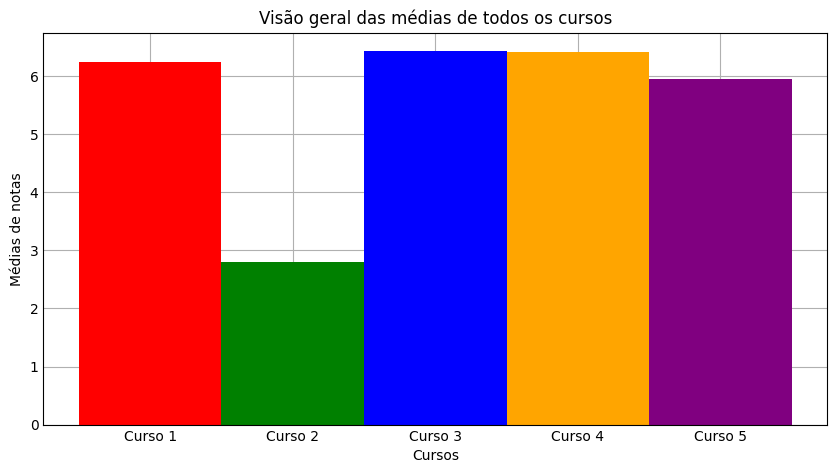

In [ ]:
plt.style.use('_mpl-gallery')

# Definindo variáveis:

cursos = ['Curso 1', 'Curso 2', 'Curso 3', 'Curso 4', 'Curso 5']
cores = ['red', 'green', 'blue', 'orange', 'purple']
largura_barras = 1



plt.figure(figsize=(8,4))

plt.bar(cursos, medias_por_curso,
        color=cores,
        width=largura_barras)

plt.xlabel('Cursos')
plt.ylabel('Médias de notas')
plt.title('Visão geral das médias de todos os cursos')

plt.show()

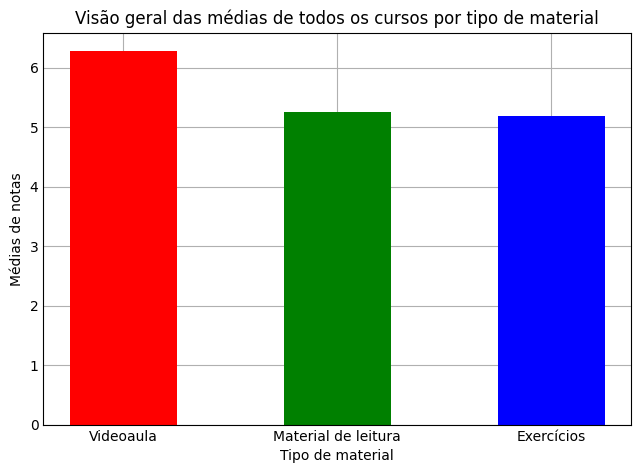

In [ ]:
plt.style.use('_mpl-gallery')

# Definindo variáveis:

tipo_de_aula = ['Videoaula', 'Material de leitura', 'Exercícios']
cores = ['red', 'green', 'blue', 'orange', 'brown']
medias_tipo_aula = [media_vid_todoscur, media_mat_todoscur, media_ex_todoscur]
largura_barras = 0.5



plt.figure(figsize=(6,4))

plt.bar(tipo_de_aula, medias_tipo_aula,
        color=cores,
        width=largura_barras)

plt.xlabel('Tipo de material')
plt.ylabel('Médias de notas')
plt.title('Visão geral das médias de todos os cursos por tipo de material')

plt.show()

### **4.2: Gráficos por curso**

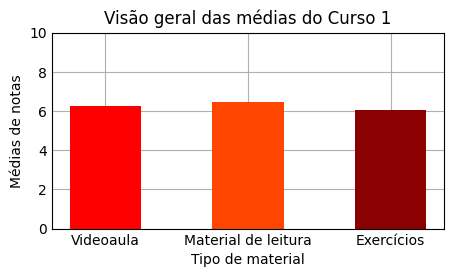

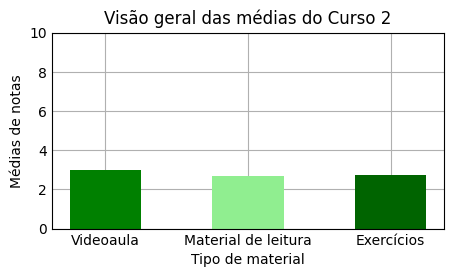

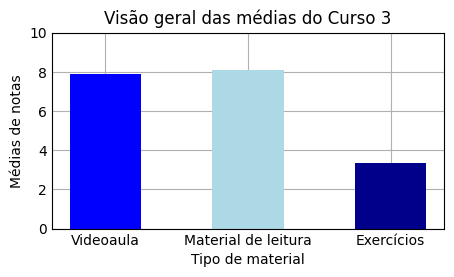

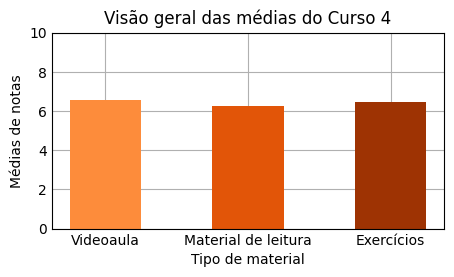

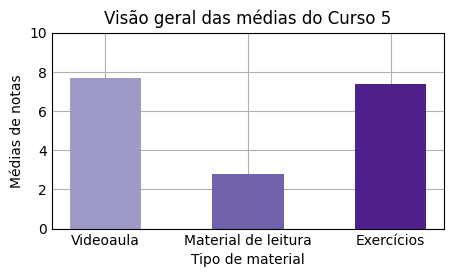

In [ ]:
plt.style.use('_mpl-gallery')

# Curso 1 Definindo variáveis:

tipo_de_aula1 = ['Videoaula', 'Material de leitura', 'Exercícios']
medias_tipo_aula1 = [media_vid_cur1, media_mat_cur1, media_ex_cur1]
cores1 = ['red', 'orangered', 'darkred']




plt.figure(figsize=(4,2))

plt.bar(tipo_de_aula1, medias_tipo_aula1,
        color=cores1,
        width=largura_barras)


plt.xlabel('Tipo de material')
plt.ylabel('Médias de notas')
plt.title('Visão geral das médias do Curso 1')
plt.ylim(0,10)

plt.show()

# Curso 2 Definindo variáveis:

tipo_de_aula2 = ['Videoaula', 'Material de leitura', 'Exercícios']
medias_tipo_aula2 = [media_vid_cur2, media_mat_cur2, media_ex_cur2]
cores2 = ['green', 'lightgreen', 'darkgreen']
largura_barras = 0.5


plt.figure(figsize=(4,2))



plt.bar(tipo_de_aula2, medias_tipo_aula2,
        color=cores2,
        width=largura_barras)

plt.xlabel('Tipo de material')
plt.ylabel('Médias de notas')
plt.title('Visão geral das médias do Curso 2')
plt.ylim(0,10)

plt.show()

# Curso 3 Definindo variáveis:

tipo_de_aula = ['Videoaula', 'Material de leitura', 'Exercícios']
medias_tipo_aula = [media_vid_cur3, media_mat_cur3, media_ex_cur3]
cores = ['blue', 'lightblue', 'darkblue']
largura_barras = 0.5



plt.figure(figsize=(4,2))

plt.bar(tipo_de_aula, medias_tipo_aula,
        color=cores,
        width=largura_barras)

plt.xlabel('Tipo de material')
plt.ylabel('Médias de notas')
plt.title('Visão geral das médias do Curso 3')
plt.ylim(0,10)

plt.show()

# Curso 4 Definindo variáveis:

tipo_de_aula = ['Videoaula', 'Material de leitura', 'Exercícios']
medias_tipo_aula = [media_vid_cur4, media_mat_cur4, media_ex_cur4]
cores = [plt.cm.Oranges(0.5),plt.cm.Oranges(0.7),plt.cm.Oranges(0.9), ]
largura_barras = 0.5



plt.figure(figsize=(4,2))

plt.bar(tipo_de_aula, medias_tipo_aula,
        color=cores,
        width=largura_barras)

plt.xlabel('Tipo de material')
plt.ylabel('Médias de notas')
plt.title('Visão geral das médias do Curso 4')
plt.ylim(0,10)

plt.show()


# Curso 5 Definindo variáveis:

tipo_de_aula = ['Videoaula', 'Material de leitura', 'Exercícios']
medias_tipo_aula = [media_vid_cur5, media_mat_cur5, media_ex_cur5]
cores = [plt.cm.Purples(0.5),plt.cm.Purples(0.7),plt.cm.Purples(0.9), ]
largura_barras = 0.5



plt.figure(figsize=(4,2))

plt.bar(tipo_de_aula, medias_tipo_aula,
        color=cores,
        width=largura_barras)

plt.xlabel('Tipo de material')
plt.ylabel('Médias de notas')
plt.title('Visão geral das médias do Curso 5')
plt.ylim(0,10)

plt.show()

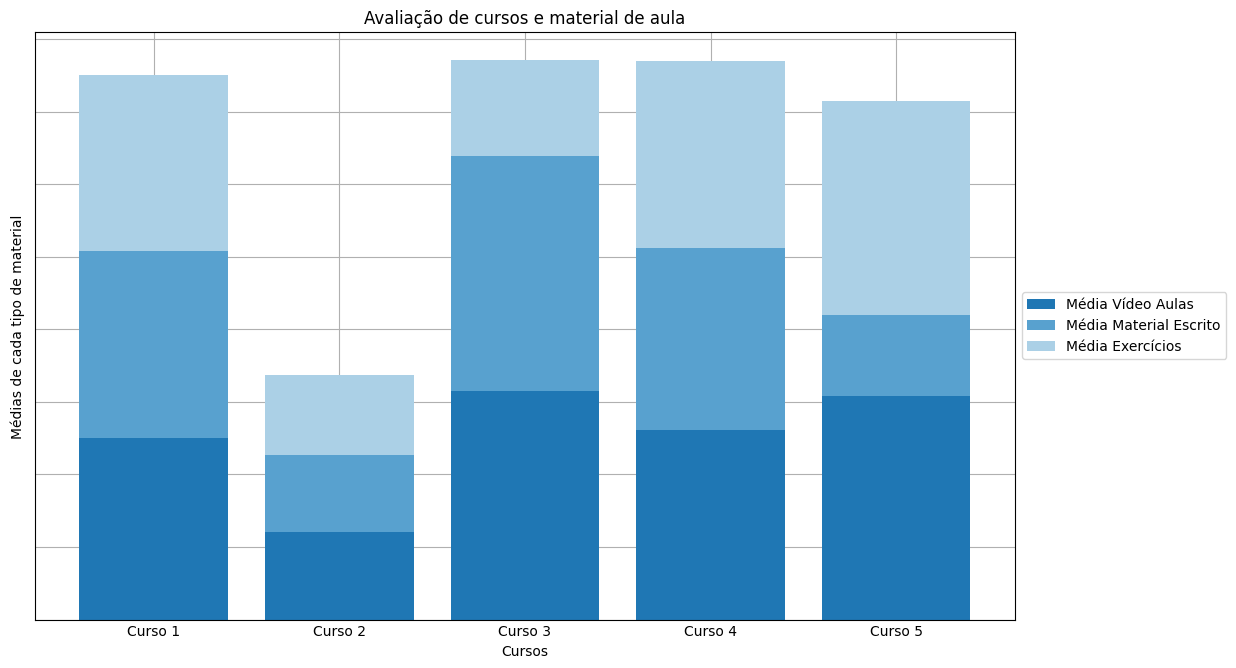

In [ ]:
valores1 = [media_vid_cur1, media_vid_cur2, media_vid_cur3, media_vid_cur4, media_vid_cur5]
valores2 = [media_mat_cur1, media_mat_cur2, media_mat_cur3, media_mat_cur4, media_mat_cur5]
valores3 = [media_ex_cur1, media_ex_cur2, media_ex_cur3, media_ex_cur4, media_ex_cur5]


index = [0, 1, 2, 3, 4]
plt.figure(figsize=(10, 6))

plt.title('Avaliação de cursos e material de aula')
plt.xticks(index, ('Curso 1', 'Curso 2', 'Curso 3', 'Curso 4', 'Curso 5'))
bar1= plt.bar(index, valores1)
bar2= plt.bar(index, valores2, bottom=valores1)
bar3= plt.bar(index, valores3, bottom=[i+j for i,j in zip(valores1, valores2)])
plt.xlabel('Cursos')
plt.ylabel('Médias de cada tipo de material')
plt.legend((bar1[0], bar2[0], bar3[0]), ('Média Vídeo Aulas', 'Média Material Escrito', 'Média Exercícios'), loc='center left', bbox_to_anchor=(1, 0.5))
plt.gca().set_yticklabels([])


plt.show()

### **Gráfico alunos**

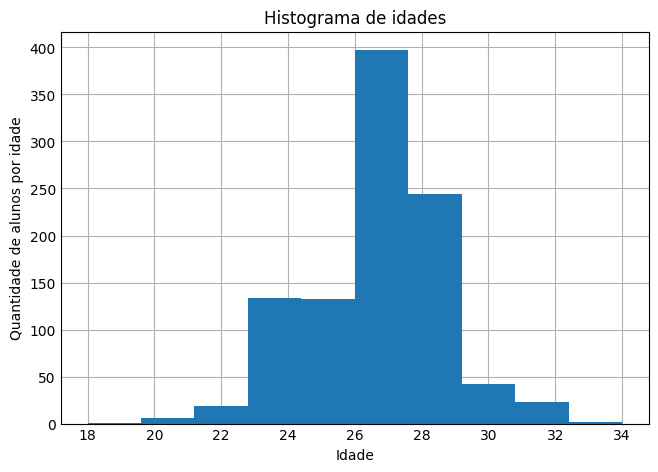

In [ ]:
import matplotlib.pyplot as plt



plt.figure(figsize=(6,4))

plt.hist(idade)
plt.xlabel('Idade')
plt.ylabel('Quantidade de alunos por idade')
plt.title('Histograma de idades')


plt.show()

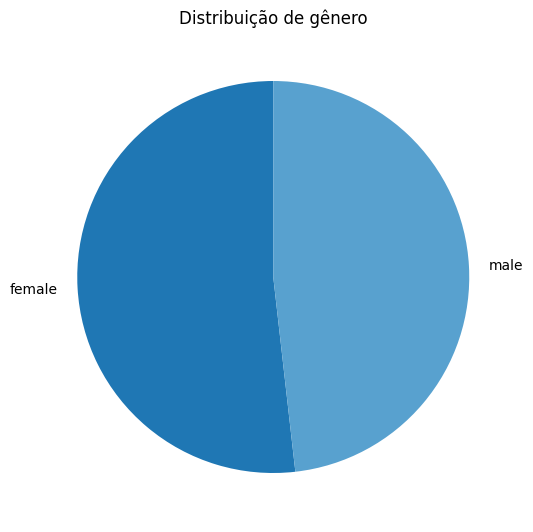

In [ ]:
df_alunos

cont_gender = df_alunos['gender'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(cont_gender, labels=cont_gender.index, startangle=90)
plt.title('Distribuição de gênero')
plt.show()

### **4.3: Análise de texto (em desenvolvimento)**


In [ ]:
# from wordcloud import WordCloud, ImageColorGenerator
# from PIL import Image
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

In [ ]:
# curso1_df['Escreva aqui suas sugestões, críticas e elogios']

# dic_cur1 = {}
# for texto, Total in curso1_df.values:
#   dic_cur1[texto] = Total

# wordcloud = WordCloud()

# wordcloud.generate_from_frequencies(frequencies = dic_cur1)

# plt.figure(figsize = (15, 10)) # tamanho do gráfico
# plt.imshow(wordcloud, interpolation = 'bilinear') # plotagem da nuvem de palavras
# plt.axis('off') # remove as bordas
# plt.show() # mostra a word cloud

In [ ]:
# !pip install nltk

In [ ]:
# import nltk
# nltk.download()



In [ ]:
# nltk.download('punkt')  # Certifique-se de ter o tokenizador Punkt baixado
# nltk.download('floresta')  # Certifique-se de ter o etiquetador POS para o português baixado

In [ ]:
# from nltk.tokenize import sent_tokenize, word_tokenize
# from nltk.corpus import floresta

In [ ]:
# texto = 'A videoaula foi incrível! As explicações foram claras e fáceis de entender, e os exercícios práticos me ajudaram a aplicar o que aprendi.'


# print(texto.split('.'))

# tokens = nltk.word_tokenize(texto, language='portuguese')

# classes = nltk.pos_tag(tokens)

# print(classes)

In [ ]:
# import nltk
# nltk.download('punkt')  # Certifique-se de ter o tokenizador Punkt baixado
# nltk.download('floresta')  # Certifique-se de ter o etiquetador POS para o português baixado

# from nltk.tokenize import sent_tokenize, word_tokenize
# from nltk.corpus import floresta

# # Texto em português
# texto = 'A videoaula foi incrível! As explicações foram claras e fáceis de entender, e os exercícios práticos me ajudaram a aplicar o que aprendi.'

# # Dividir o texto em frases
# frases = sent_tokenize(texto, language='portuguese')

# # Tokenizar e etiquetar as palavras em cada frase
# tokens_e_classes = []
# for frase in frases:
#     tokens = word_tokenize(frase, language='portuguese')
#     classes = floresta.tagged_words()
#     tokens_e_classes.append(list(zip(tokens, classes)))


# # Imprimir as frases tokenizadas e etiquetadas
# for frase in tokens_e_classes:
#     print(frase)
